<a href="https://www.kaggle.com/code/fernandolima23/knn-stellar-classification?scriptVersionId=233547049" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# $\Large{\color{darkblue}{\textbf{KNN}}}$

# $\large{\color{darkred}{1.}}$ $\large{\color{darkblue}{\textbf{Importing Libraries}}}$ $\color{red}{✓}$

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import os
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, roc_curve, roc_auc_score

# $\large{\color{darkred}{2.}}$ $\large{\color{darkblue}{\textbf{Reading the data}}}$ $\color{red}{✓}$

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
Data = pd.read_csv("/kaggle/input/star-categorization-giants-and-dwarfs/Star3642_balanced.csv")
pd.set_option("display.max_columns", 7)
Data.head()

/kaggle/input/star-categorization-giants-and-dwarfs/Star99999_raw.csv
/kaggle/input/star-categorization-giants-and-dwarfs/Star39552_balanced.csv
/kaggle/input/star-categorization-giants-and-dwarfs/Star9999_raw.csv
/kaggle/input/star-categorization-giants-and-dwarfs/Star3642_balanced.csv


,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


# $\large{\color{darkred}{3.}}$ $\large{\color{darkblue}{\textbf{Data Preprocessing}}}$

# ${\color{darkred}{3.1.}}$ ${\color{darkblue}{\textbf{Categorical variables Treatment}}}$  $\color{red}{✓}$

In [3]:
Data["SpType"].value_counts()

K0III          293
K1III          200
K2III          156
G8III          135
F5V            125
              ... 
B9.5IV           1
B0Ibp            1
M0V              1
B1Vv SB          1
M0/M1IIICNp      1
Name: SpType, Length: 584, dtype: int64

In [4]:
Data.drop(["SpType"], axis = 1, inplace = True)

In [5]:
Data.head()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,5.99,13.73,0.58,1.318,16.678352,0
1,8.70,2.31,1.29,-0.045,15.518060,0
2,5.77,5.50,1.03,0.855,14.471813,0
3,6.72,5.26,0.74,-0.015,15.324928,1
4,8.76,13.44,1.16,0.584,19.401997,1


# ${\color{darkred}{3.2.}}$ ${\color{darkblue}{\textbf{Missing Values Treatment}}}$  $\color{red}{✓}$

In [6]:
Missing_values_percent = 100*(Data.isnull().sum()/len(Data["B-V"]))
print(Missing_values_percent)

Vmag           0.0
Plx            0.0
e_Plx          0.0
B-V            0.0
Amag           0.0
TargetClass    0.0
dtype: float64


${\color{darkred}{\textbf{There are NO missing values in the dataset!!}}}$

# ${\color{darkred}{3.3.}}$ ${\color{darkblue}{\textbf{dtypes}}}$ $\color{red}{✓}$

In [7]:
Data.dtypes

Vmag           float64
Plx            float64
e_Plx          float64
B-V            float64
Amag           float64
TargetClass      int64
dtype: object

# ${\color{darkred}{3.4.}}$ ${\color{darkblue}{\textbf{Correlation}}}$ $\color{red}{✓}$

# ${\color{darkred}{3.4.1.}}$ ${\color{darkblue}{\textbf{Absolute magnitude x color index B-V}}}$ $\color{red}{✓}$

${\color{darkred}{\textbf{The "Amag" column values are wrong !! So let's create a new column with the correct absolute magnitude values.}}}$

In [8]:
Data = Data.loc[:,["Vmag", "Plx", "B-V", "TargetClass"]][Data.loc[:,["Vmag", "Plx", "B-V", "TargetClass"]]["Plx"]>0]

In [9]:
B_V = np.array(Data["B-V"], dtype=float)
V_mag = np.array(Data["Vmag"], dtype=float)
Plx = np.array(Data["Plx"], dtype=float)

In [10]:
dispc = (1000/Plx) # Plx (mas)
Absmag = V_mag-5*np.log10(dispc/10) # Absolute magnitude
Data["Absmag"] = Absmag

In [11]:
Data.head()

,Vmag,Plx,B-V,TargetClass,Absmag
0,5.99,13.73,1.318,0,1.678353
1,8.70,2.31,-0.045,0,0.518060
2,5.77,5.50,0.855,0,-0.528187
3,6.72,5.26,-0.015,1,0.324929
4,8.76,13.44,0.584,1,4.401996


In [12]:
Fonte1 = {"family": "serif", "weight": "bold", "color": "darkorange", "size": 18}
Fonte2 = {"family": "serif", "weight": "bold", "color": "darkorange", "size": 20}
Fonte3 = FontProperties(family="serif", weight='bold', style='normal', size=19)

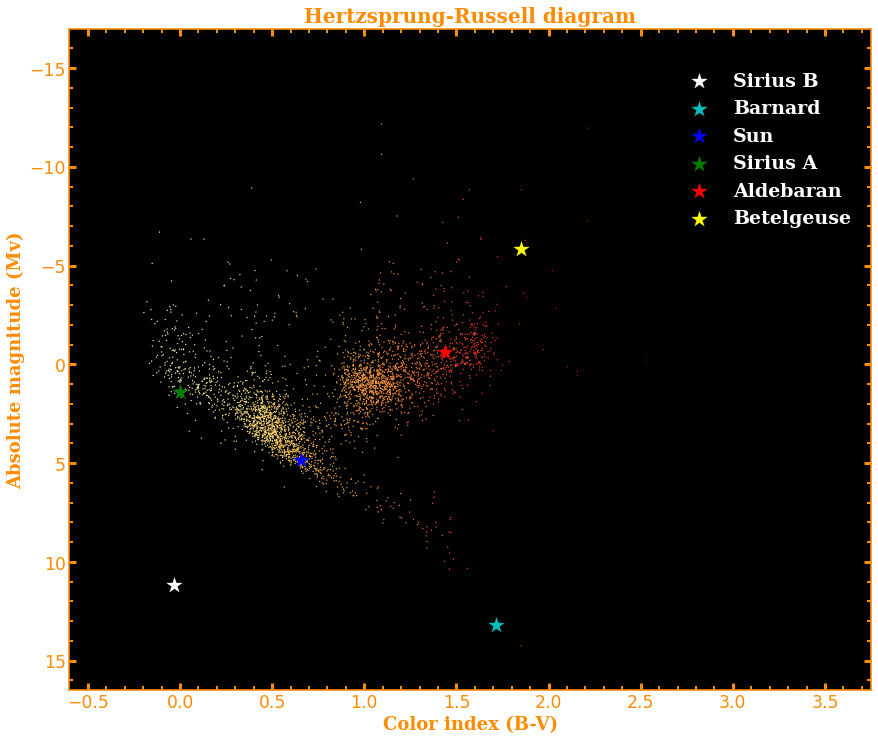

In [13]:
fig, ax = plt.subplots(figsize=(12.5,10.4))
ax.scatter(Data["B-V"], Absmag, c=Data["B-V"],  cmap = "YlOrRd", marker = '.', s = 7, linewidth = 0.01)
ax.scatter(x = -0.03, y = 11.18, c = "white", marker = '*', s = 270, linewidth = 0.2, label = "Sirius B")
ax.scatter(x = 1.713, y = 13.21, c = "c", marker = '*', s = 270, linewidth = 0.2, label = "Barnard")
ax.scatter(x = 0.656, y = 4.83, c = "blue", marker = '*', s = 270, linewidth = 0.2, label = "Sun")
ax.scatter(x = 0, y = 1.42, c = "green", marker = '*', s = 270, linewidth = 0.2, label = "Sirius A")
ax.scatter(x = 1.44, y = -0.641, c = "red", marker = '*', s = 270, linewidth = 0.2, label = "Aldebaran")
ax.scatter(x = 1.85, y = -5.85, c = "yellow", marker = '*', s = 270, linewidth = 0.2, label = "Betelgeuse")
plt.xlabel("Color index (B-V)", fontdict = Fonte1)
plt.ylabel("Absolute magnitude (Mv)", fontdict = Fonte1)
plt.title("Hertzsprung-Russell diagram", fontdict = Fonte2)
plt.xlim(-0.6, 3.75)
plt.ylim(16.5, -17) 
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = "both", direction = "in", labelcolor='darkorange', labelsize='xx-large', top = True, right = True)
ax.tick_params(which='major', direction = "in", color='darkorange', length=7, width = 3)
ax.tick_params(which='minor', direction = "in", length=4, color='darkorange', width = 2, top = True, right = True)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_color("darkorange")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.6)
Color_BC = plt.gca()
Color_BC.set_facecolor("black")
Color_BC.patch.set_alpha(1)
plt.legend(frameon = False, prop = Fonte3, labelcolor = "white", bbox_to_anchor = (0.74,0.96), loc = 2)
plt.tight_layout()
plt.show()

# ${\color{darkred}{3.4.2.}}$ ${\color{darkblue}{\textbf{Histograms and Heatmaps}}}$ $\color{red}{✓}$

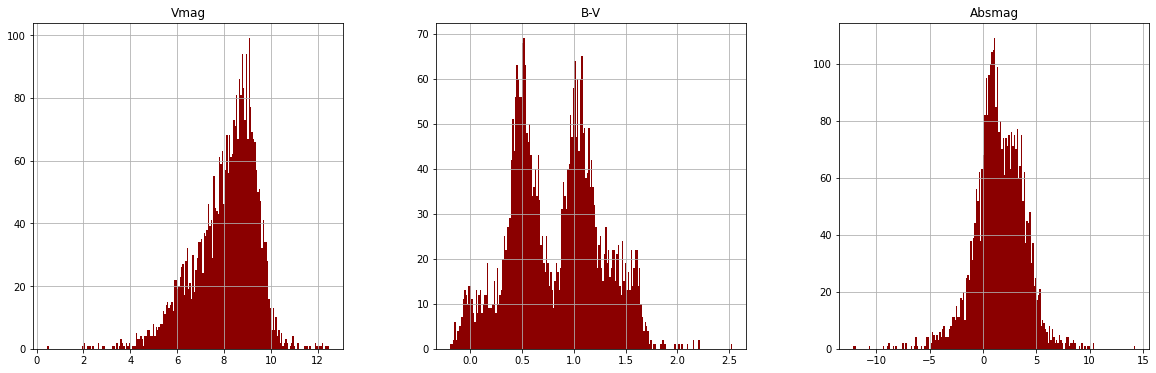

In [14]:
Data[["Vmag", "B-V", "Absmag"]].hist(figsize = (20,6), color = "darkred", bins =  200, layout = (1,3))
plt.show()

${\color{darkblue}{\textbf{Heatmap}}}$

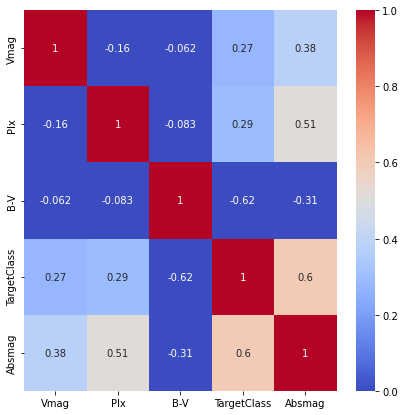

In [15]:
plt.figure(figsize = (7,7))
sbn.heatmap(Data.corr(), annot = True, vmin = 0, cmap = "coolwarm")
plt.show()

In [16]:
Data["TargetClass"].value_counts()

1    1795
0    1750
Name: TargetClass, dtype: int64

# ${\color{darkred}{3.5.}}$ ${\color{darkblue}{\textbf{Data split}}}$ $\color{red}{✓}$

In [17]:
Norm = MinMaxScaler()
x = Data.drop(["TargetClass"], axis = 1)
x = Norm.fit_transform(x)
y = Data["TargetClass"]

In [18]:
# Train - test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)

# $\large{\color{darkred}{4.}}$ $\large{\color{darkblue}{\textbf{KNN}}}$ $\color{red}{✓}$

In [19]:
ModelKNN = KNeighborsClassifier()

In [20]:
%%time
# Fine - tuning KNN
K_values = np.array([11, 12, 13, 14, 15, 16, 17, 18])
metric = ["minkowski", "chebyshev"]
p = np.array([1, 2, 3, 4, 5, 6])
param_grid = {"n_neighbors": K_values, "metric": metric, "p": p}
GridKNN = GridSearchCV(estimator = ModelKNN, param_grid = param_grid, cv = 5)
GridKNN.fit(x_train, y_train)
print(GridKNN.best_score_)
print(GridKNN.best_estimator_.n_neighbors)
print(GridKNN.best_estimator_.metric)
print(GridKNN.best_estimator_.p)

0.9097050042188615
14
minkowski
5
CPU times: user 14.1 s, sys: 7.24 ms, total: 14.1 s
Wall time: 14.1 s


In [21]:
ModelKNN = KNeighborsClassifier(n_neighbors = 14, metric = "minkowski", p = 5)

In [22]:
ModelKNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=14, p=5)

${\color{darkblue}{\textbf{Prediction}}}$

In [23]:
y_pred = ModelKNN.predict(x_test)

# ${\color{darkred}{4.1.}}$ ${\color{darkblue}{\textbf{Confusion matrix}}}$ $\color{red}{✓}$

In [24]:
Matrix = confusion_matrix(y_test, y_pred)
print(Matrix)

[[483  48]
 [ 76 457]]


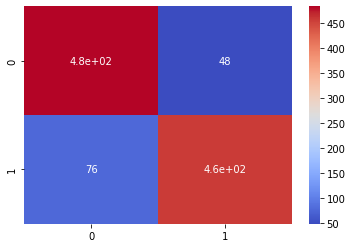

In [25]:
sbn.heatmap(Matrix, annot = True, cmap = "coolwarm")
plt.show()

In [26]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")

Accuracy: 0.8834586466165414
Recall: 0.8574108818011257
Precision: 0.904950495049505
